We find that the time for reaching the adiabatic regime is given by
$$
t_\mathrm{adiab.} \sim 100 \max_t a(t),
$$
where $a(t)$ is the adiabaticity (see notebook for Fig.04).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from HQUAD_lib.QUAD_utils import solve_LZ
from HQUAD_lib.parallel_utils import parameter_run
from HQUAD_lib.hamiltonians import lz_problem

In [2]:
def compute_adiabaticity(alpha, beta):
        z_sol = solve_LZ(alpha, beta, x=x)

        s = np.linspace(0, 1, len(z_sol))
    
        hypermatrix_2 = np.array([lz_problem(x, z) for z in z_sol])
        partial_hamiltonian_2 = np.array([lz_problem(0, 1) for _ in range(len(z_sol))])
        d_z = np.gradient(z_sol, s)
        eigvalues_2, eigmodes_2 = np.linalg.eigh(hypermatrix_2)
        
        partial_hamiltonian_2 = partial_hamiltonian_2 * d_z[:, None, None]
        
        num = np.abs(np.einsum('ia,iab,ib->i', eigmodes_2[..., 0].conj(), partial_hamiltonian_2,
                               eigmodes_2[..., 1], optimize='greedy'))
        den = np.abs(eigvalues_2[:, 0] - eigvalues_2[:, 1]) ** 2
    
        c = num / den
        
        return np.max(c)

In [3]:
x = 1
alphas = np.linspace(-5, 20, 101) * 2
beta = 0

adiabaticity = parameter_run(compute_adiabaticity, 'alpha', alphas, beta=0)

compute_adiabaticity: [['alpha']]:   0%|          | 0/101 [00:00<?, ?it/s]

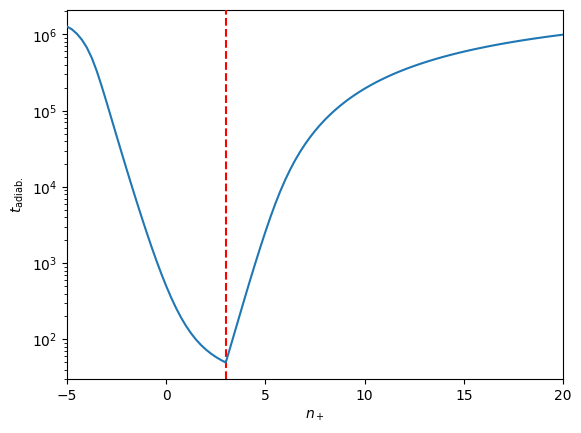

In [4]:
fig, ax = plt.subplots()

n_plus = (alphas + beta) / 2
ax.plot(n_plus, adiabaticity / 0.01, zorder=4)

ax.set_xlim(min(n_plus), max(n_plus))
ax.axvline((4 + 2) / 2, color='r', ls='--', zorder=3)
ax.set_yscale('log')
ax.set_xlabel(r'$n_+$')
ax.set_ylabel(r'$t_\mathrm{adiab.}$');